ValueError: not enough values to unpack (expected 5, got 4)

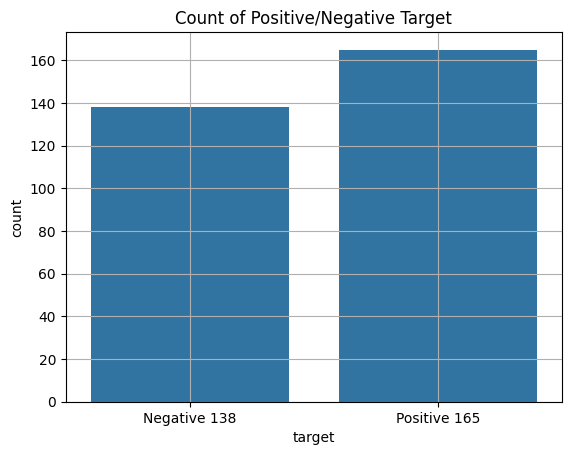

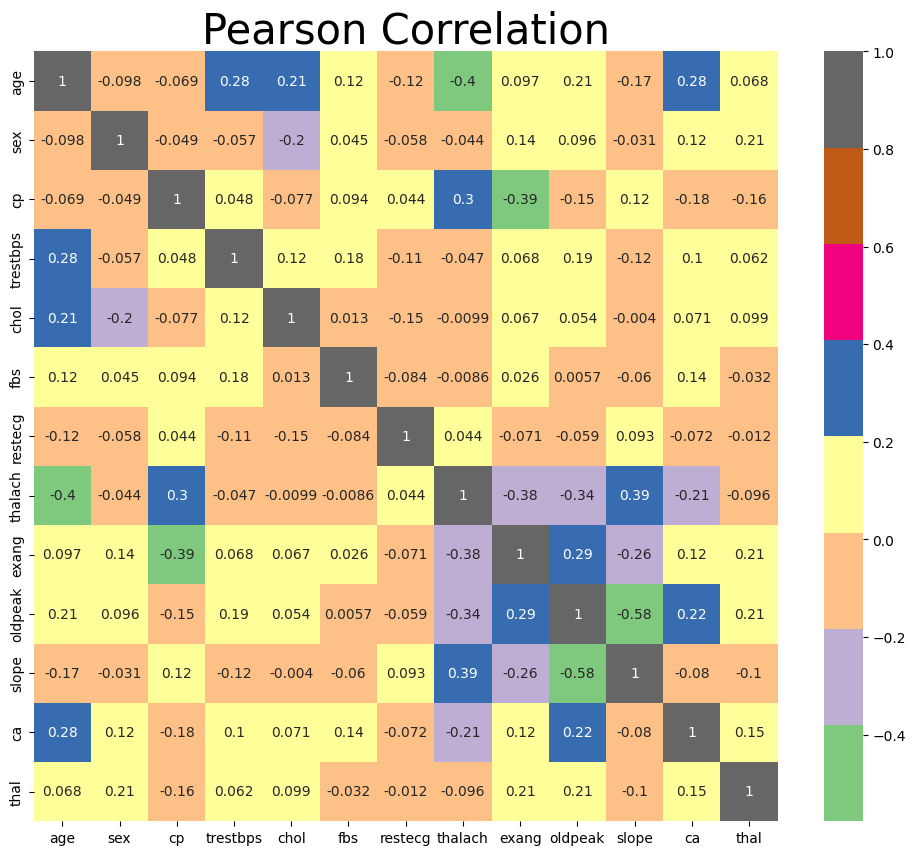

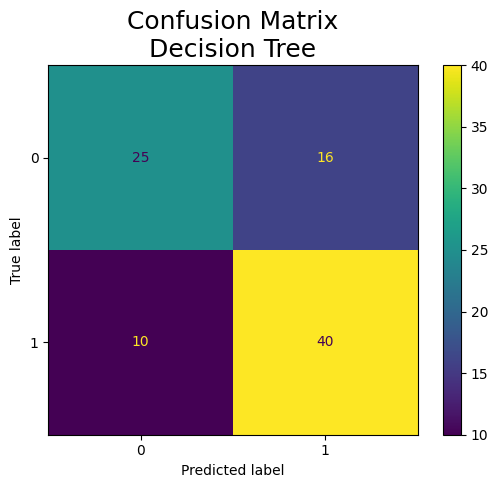

In [99]:
import pandas as pd
from app.data import data_info
from app.data_prepross import preprocess
from app.analizer import P_corr, splitdata,\
      decision_tree, random_forest,naive_bayes,\
      suppor_vector_machine, K_N_N

dataset = data_info()
X,y = preprocess(dataset)
P_corr(X)
X_train, X_test, y_train, y_test = splitdata(X,y)

models = [decision_tree,random_forest,naive_bayes,suppor_vector_machine,K_N_N]
name_models = ["decision_tree","random_forest","naive_bayes","suppor_vector_machine","K_N_N"]

accuracy_model = []
accuracy=[]
precision=[]
recall=[]
f1=[]

for model in models:
      a,s,p,r,f = model(X_train,y_train,X_test,y_test)
      accuracy_model.append(a)
      accuracy.append(s)
      precision.append(p)
      recall.append(r)
      f1.append(f)

#Create de Benchmark data
bench_data = pd.DataFrame({
    'Model': name_models,
    'Accuracy_Model' : accuracy_model,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

import matplotlib.pyplot as plt
import numpy as np

categories = list(bench_data)[1:]  # Esto excluye la primera columna que es 'Model'
N = len(categories)

# Qué valor de 'angle' corresponde a cada eje
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Se completa el círculo cerrando el polígono

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})
#ax = plt.subplot(111, polar=True)

# Dibujar un eje por cada atributo con su etiqueta
plt.xticks(angles[:-1],categories, color='b', size=15)
#plt.xticks(angles[:-1], []) 
# Dibujar las líneas de los ejes desde el centro hacia cada métrica
ax.set_rlabel_position(0)
#plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
plt.ylim(0,1)
ax.set_yticklabels([])
# Dibujar cada modelo en el radar chart
for i in range(bench_data.shape[0]):
      values = bench_data.loc[i].drop('Model').values.flatten().tolist()
      values += values[:1]  # Se completa el círculo
      ax.plot(angles, values, linewidth=2, linestyle='solid', label=bench_data['Model'][i])
      ax.fill(angles, values, alpha=0.4)
ax.set_xticklabels(categories, fontsize=13)
# Añadir una leyenda
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.tight_layout(pad=2)
plt.savefig('output/bench.png', dpi=300)

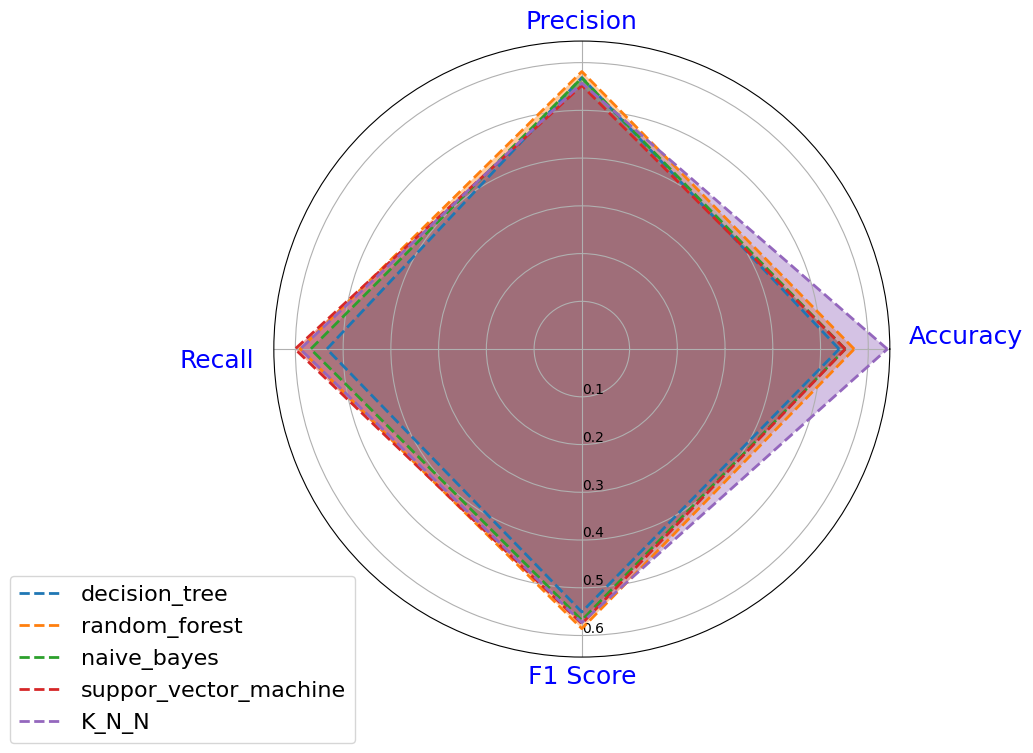

In [96]:

import matplotlib.pyplot as plt
import numpy as np

categories = list(bench_data)[1:]  # Esto excluye la primera columna que es 'Model'
N = len(categories)

angles = [n/float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1] 
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})
plt.xticks(angles[:-1],categories, color='b',size=18)
ax.set_rlabel_position(270)

for i in range(bench_data.shape[0]):
    values = bench_data.loc[i].drop('Model').values.flatten().tolist()
    values += values[:1]  # Se completa el círculo
    ax.plot(angles,np.log1p(values), linewidth=2, linestyle='--', label=bench_data['Model'][i])
    ax.fill(angles,np.log1p(values), alpha=0.4)

for label, angle in zip(ax.get_xticklabels(), angles):
    if label.get_text() == 'Accuracy' or label.get_text() == 'Recall':
        label.set_horizontalalignment('left' if angle < np.pi else 'right')
        label.set_verticalalignment('bottom' if angle < np.pi/2 or angle > 3*np.pi/2 else 'top')
        #label.set_pad(20)  # Uso de set_pad para ajustar el espacio

plt.legend(loc='upper right', bbox_to_anchor=(0.15, 0.15),fontsize=16)

In [69]:
1+np.log(bench_data["Accuracy"])


0    0.663528
1    0.737636
2    0.693833
3    0.693833
4    0.890438
Name: Accuracy, dtype: float64

In [67]:
bench_data["Accuracy"]

0    0.714286
1    0.769231
2    0.736264
3    0.736264
4    0.896226
Name: Accuracy, dtype: float64